<a href="https://colab.research.google.com/github/Mashhoodaliyusuf/Logistic-Regression-Classification/blob/main/Logistic_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import math

# **Problem Statement**
You have been given a dataset that includes all the medical condition of a patient. You need to build a classifier that can predict how likely a patient can get a heart stroke.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/assignment/healthcare-dataset-stroke-data.csv')

# EDA - Exploratory Data Analysis (DE,DM,DC,DV)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
df.drop('id',axis=1, inplace=True)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df.gender.replace('Other','Female', inplace=True)

In [13]:
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [14]:
df[df.age<1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [15]:
# Working on age
for i in range(len(df.age)):
  diff = df.age[i] - int(df.age[i])
  if diff >= 0.5:
    df.age[i] = math.ceil(df.age[i])
  else:
    df.age[i] = math.floor(df.age[i])  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
df[df.age<1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
564,Female,0.0,0,0,No,children,Rural,73.71,16.2,Unknown,0
996,Male,0.0,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.0,0,0,No,children,Rural,55.86,16.0,Unknown,0
1600,Male,0.0,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.0,0,0,No,children,Urban,139.67,14.1,Unknown,0
1999,Male,0.0,0,0,No,children,Rural,146.97,18.5,Unknown,0
2030,Male,0.0,0,0,No,children,Urban,73.02,NaN,Unknown,0
2579,Male,0.0,0,0,No,children,Urban,127.78,20.8,Unknown,0
2898,Male,0.0,0,0,No,children,Urban,58.35,18.6,Unknown,0
3295,Male,0.0,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [17]:
df[df.age==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
564,Female,0.0,0,0,No,children,Rural,73.71,16.2,Unknown,0
996,Male,0.0,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.0,0,0,No,children,Rural,55.86,16.0,Unknown,0
1600,Male,0.0,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.0,0,0,No,children,Urban,139.67,14.1,Unknown,0
1999,Male,0.0,0,0,No,children,Rural,146.97,18.5,Unknown,0
2030,Male,0.0,0,0,No,children,Urban,73.02,NaN,Unknown,0
2579,Male,0.0,0,0,No,children,Urban,127.78,20.8,Unknown,0
2898,Male,0.0,0,0,No,children,Urban,58.35,18.6,Unknown,0
3295,Male,0.0,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [18]:
df.age = df.age.astype('int')

In [19]:
df.age.replace(0,1, inplace=True)

In [20]:
df[df.age==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [22]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [23]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [24]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [25]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [26]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [27]:
df.avg_glucose_level.unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [28]:
df.bmi.nunique()

418

In [29]:
df[df.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [30]:
df.bmi.mean()

28.893236911794666

In [31]:
df.bmi.mode()

0    28.7
dtype: float64

In [32]:
df.bmi.fillna(df.bmi.mean(), inplace=True)

In [33]:
df[df.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [34]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# Here we have found that 1544 people are unknown. We will check its job status. If it is children, definitely he will not smoke.

In [35]:
df.loc[df.work_type=='children', ['work_type','smoking_status']]

,work_type,smoking_status
162,children,Unknown
245,children,Unknown
249,children,Unknown
282,children,Unknown
290,children,Unknown
...,...,...
5089,children,Unknown
5094,children,Unknown
5095,children,Unknown
5098,children,Unknown


In [36]:
df[(df.work_type=='children') &  (df.smoking_status=='Unknown')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,Female,14,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,Male,3,0,0,No,children,Rural,95.12,18.000000,Unknown,0
282,Female,3,0,0,No,children,Urban,73.74,16.000000,Unknown,0
290,Male,13,0,0,No,children,Urban,114.84,18.300000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,1,0,0,No,children,Rural,62.13,16.800000,Unknown,0
5094,Male,13,0,0,No,children,Urban,82.38,24.300000,Unknown,0
5095,Male,1,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,Male,9,0,0,No,children,Urban,71.88,17.500000,Unknown,0


In [37]:
df.loc[df.work_type=='children',['smoking_status']] = df.loc[df.work_type=='children',['smoking_status']].replace('Unknown','never smoked')

In [38]:
df.loc[df.work_type=='children', ['work_type','smoking_status']]

,work_type,smoking_status
162,children,never smoked
245,children,never smoked
249,children,never smoked
282,children,never smoked
290,children,never smoked
...,...,...
5089,children,never smoked
5094,children,never smoked
5095,children,never smoked
5098,children,never smoked


In [39]:
df.smoking_status.value_counts()

never smoked       2510
Unknown             926
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [40]:
df.smoking_status.replace(['never smoked','formerly smoked'],['never_smoked','formerly_smoked'], inplace=True)

In [41]:
df.smoking_status.value_counts()

never_smoked       2510
Unknown             926
formerly_smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [42]:
ohe  = OneHotEncoder(sparse=False)

In [43]:
smoke = ohe.fit_transform(df[['smoking_status']])

In [44]:
smoke

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [45]:
df['smoking_status']

0       formerly_smoked
1          never_smoked
2          never_smoked
3                smokes
4          never_smoked
             ...       
5105       never_smoked
5106       never_smoked
5107       never_smoked
5108    formerly_smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [ ]:
# ORDER : Unknown, formerly smoked, never_smoked, smokes

In [46]:
df[['Unknown', 'formerly_smoked', 'never_smoked', 'smokes']] = smoke

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly_smoked,never_smoked,smokes
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1,0.0,1.0,0.0,0.0
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never_smoked,1,0.0,0.0,1.0,0.0
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never_smoked,1,0.0,0.0,1.0,0.0
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.0,0.0,0.0,1.0
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never_smoked,1,0.0,0.0,1.0,0.0


In [48]:
df.drop(['smoking_status', 'smokes'], axis=1, inplace=True)

In [49]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1,0.0,1.0,0.0


In [50]:
le = LabelEncoder()

In [51]:
le.fit_transform(df.gender)

array([1, 0, 1, ..., 0, 1, 0])

In [52]:
df.gender = le.fit_transform(df.gender)

In [ ]:
le.fit_transform(df.ever_married)

In [54]:
df.ever_married = le.fit_transform(df.ever_married)

In [55]:
df.Residence_type = le.fit_transform(df.Residence_type)

In [56]:
df.work_type.replace(['Private','Self-employed','children','Govt_job'],['Worked','Worked','Never_worked','Worked'], inplace=True)

In [57]:
 df.work_type = le.fit_transform(df.work_type)

In [58]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
0,1,67,0,1,1,1,1,228.69,36.600000,1,0.0,1.0,0.0
1,0,61,0,0,1,1,0,202.21,28.893237,1,0.0,0.0,1.0
2,1,80,0,1,1,1,0,105.92,32.500000,1,0.0,0.0,1.0
3,0,49,0,0,1,1,1,171.23,34.400000,1,0.0,0.0,0.0
4,0,79,1,0,1,1,0,174.12,24.000000,1,0.0,0.0,1.0


In [ ]:
df.info()

In [60]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
gender,1.000000,-0.027485,0.021275,0.085717,-0.029936,-0.090284,-0.005937,0.054580,-0.025464,0.009117,-0.001306,0.042738,-0.039639
age,-0.027485,1.000000,0.276430,0.263840,0.679106,0.640529,0.014228,0.238216,0.325789,0.245285,0.062834,0.236894,-0.280552
hypertension,0.021275,0.276430,1.000000,0.108306,0.164243,0.131892,-0.007913,0.174474,0.160189,0.127904,-0.065513,0.058853,-0.016650
heart_disease,0.085717,0.263840,0.108306,1.000000,0.114644,0.093402,0.003092,0.161857,0.038899,0.134914,-0.006776,0.066804,-0.077184
ever_married,-0.029936,0.679106,0.164243,0.114644,1.000000,0.554470,0.006261,0.155068,0.335705,0.108340,0.037855,0.171256,-0.234854
work_type,-0.090284,0.640529,0.131892,0.093402,0.554470,1.000000,-0.002051,0.103682,0.442423,0.085583,0.177067,0.164250,-0.382460
Residence_type,-0.005937,0.014228,-0.007913,0.003092,0.006261,-0.002051,1.000000,-0.004946,-0.000120,0.015458,0.000579,0.007654,-0.025948
avg_glucose_level,0.054580,0.238216,0.174474,0.161857,0.155068,0.103682,-0.004946,1.000000,0.168751,0.131945,-0.026267,0.068111,-0.044071
bmi,-0.025464,0.325789,0.160189,0.038899,0.335705,0.442423,-0.000120,0.168751,1.000000,0.038947,0.049994,0.104257,-0.179292
stroke,0.009117,0.245285,0.127904,0.134914,0.108340,0.085583,0.015458,0.131945,0.038947,1.000000,-0.000288,0.064556,-0.055104


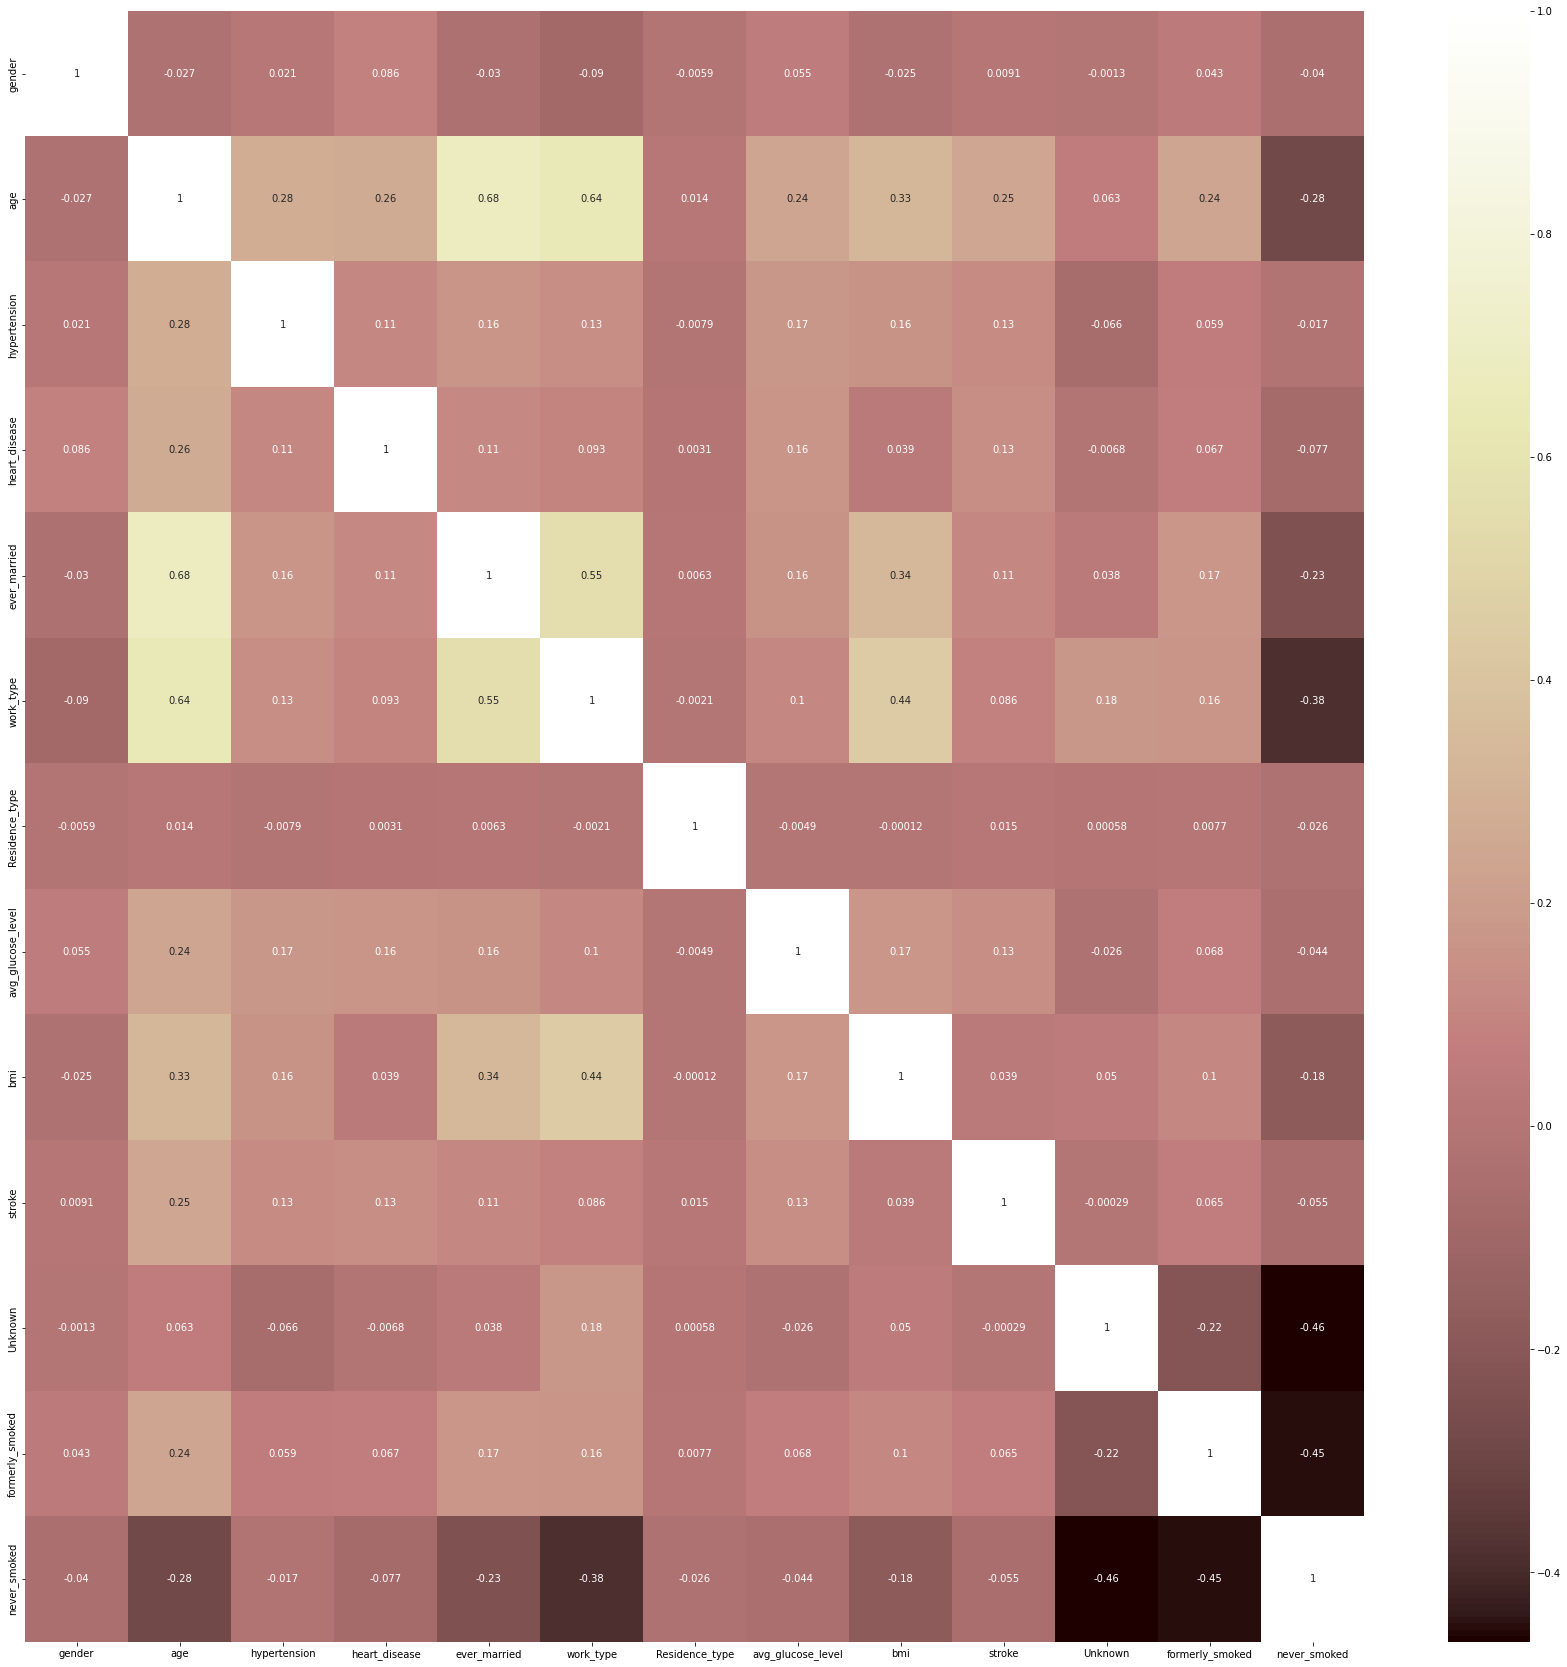

In [64]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='pink')

# **Machine Learning**

In [65]:
lr = LogisticRegression()
dt =  DecisionTreeClassifier()
rf = RandomForestClassifier()

In [66]:
X = df.drop('stroke', axis=1)
y =  df.stroke

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test

# Training the Model

In [ ]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Testing the Model

In [74]:
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)

In [75]:
final = pd.DataFrame({"Actual":y_test,"LR":lr_y_pred,"DT":dt_y_pred,"RF":rf_y_pred})

In [76]:
final

,Actual,LR,DT,RF
4688,0,0,0,0
4478,0,0,0,0
3849,0,0,0,0
4355,0,0,1,0
3826,0,0,0,0
...,...,...,...,...
3605,0,0,0,0
4934,0,0,0,0
4835,0,0,0,0
4105,0,0,0,0


In [79]:
final.corr()

,Actual,LR,DT,RF
Actual,1.000000,NaN,0.120324,-0.011253
LR,NaN,NaN,NaN,NaN
DT,0.120324,NaN,1.000000,0.201683
RF,-0.011253,NaN,0.201683,1.000000


# Performance Checking - Confusion Matrix

In [80]:
# Confusion matrix LR
confusion_matrix(y_test, lr_y_pred)

array([[960,   0],
       [ 62,   0]])

In [ ]:
# Accuracy = (960+0)/(960+0+62+0) = 0.94 = 94%

In [81]:
# Confusion matrix DT
confusion_matrix(y_test, dt_y_pred)

array([[922,  38],
       [ 53,   9]])

In [ ]:
# Accuracy = (922+9)/(922+38+53+9) = 0.91 = 91%

In [82]:
# Confusion matrix RF
confusion_matrix(y_test, rf_y_pred)

array([[958,   2],
       [ 62,   0]])

In [ ]:
# Accuracy = (958+0)/(958+2+62+0) = 0.93 = 93%

In [83]:
classification_report(y_test, lr_y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.50      0.48      1022\nweighted avg       0.88      0.94      0.91      1022\n'